Parse the data files in `data/` directory and plot the results. The data files are YAML collected using the `cloc.pl` script and are named after the corresponding `lsst_distrib` weekly tag.

In [1]:
%matplotlib notebook

In [2]:
import os
import glob
import yaml

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
yfiles = glob.glob("data/w.*.yaml")

Go through each file and convert the contents to a dict of dicts. Derive the date from the week number.

In [5]:
# Somewhere for the results
results = {}

for f in yfiles:
    # Get the year and fraction from file name
    year, week = os.path.basename(f).split(".")[1:3]

    # Not completely accurate but close enough
    yfrac = float(year) + (float(week)/52.0)

    with open(f, "r") as fd:
        data = yaml.safe_load(fd)

    results[yfrac] = {}
    these = results[yfrac]
    for item in ("code", "comment", "blank"):
        these[item] = {"python": data["Python"][item],
                       "cpp": (data["C++"][item] + data["C/C++ Header"][item]),
                       "all": data["SUM"][item]}

    # Code and comments
    these["lines"] = {}
    for lang in ("python", "cpp", "all"):
        these["lines"][lang] = these["comment"][lang] + these["code"][lang]


In [6]:
# Sorted dates
date_keys = sorted(results)
dates = np.array(date_keys)

# Create some datasets for plotting (they all have the same dates)
datasets = {}
for item in ("code", "comment", "lines"):
    for lang in ("python", "cpp", "all"):
        key = f"{lang}_{item}"
        datasets[key] = np.array([results[y][item][lang] for y in date_keys])

In [7]:
datasets.keys()

dict_keys(['python_code', 'cpp_code', 'all_code', 'python_comment', 'cpp_comment', 'all_comment', 'python_lines', 'cpp_lines', 'all_lines'])

In [8]:
datasets["python_code"]

array([136774, 115996, 109809, 110139, 110188, 114645, 112549, 113898,
       106209, 108628, 108771, 108982, 109094, 109235, 109597, 109771,
       109893, 110318, 110790, 111180, 112633, 113282, 124183, 124655,
       133690, 126352, 126899, 128269, 130655, 133801, 134749, 135166,
       135502, 134868, 130388, 130177, 130183, 132832, 133796, 133796,
       134856, 134885, 135248, 134568, 134682, 134883, 134879, 135024,
       140214, 140336, 139438, 139680, 138529, 138621, 138757, 137127,
       136466, 142814, 139609, 142730, 144313, 144959, 145195, 145570,
       146309, 149158, 151035, 151318, 151548, 151750, 156893, 155548,
       156097, 156141, 156637, 156805, 157001, 157186, 156107, 156055,
       156458, 156897, 157451, 157761, 157864, 158169, 158956, 159466,
       159630, 159726, 159811, 163273, 164165, 164147, 164404, 164483,
       166981, 167613, 167797, 167838, 168199, 168531, 183728, 182752,
       183120, 186133, 186440, 186348, 186369, 185423, 181568, 183308,
      

<IPython.core.display.Javascript object>


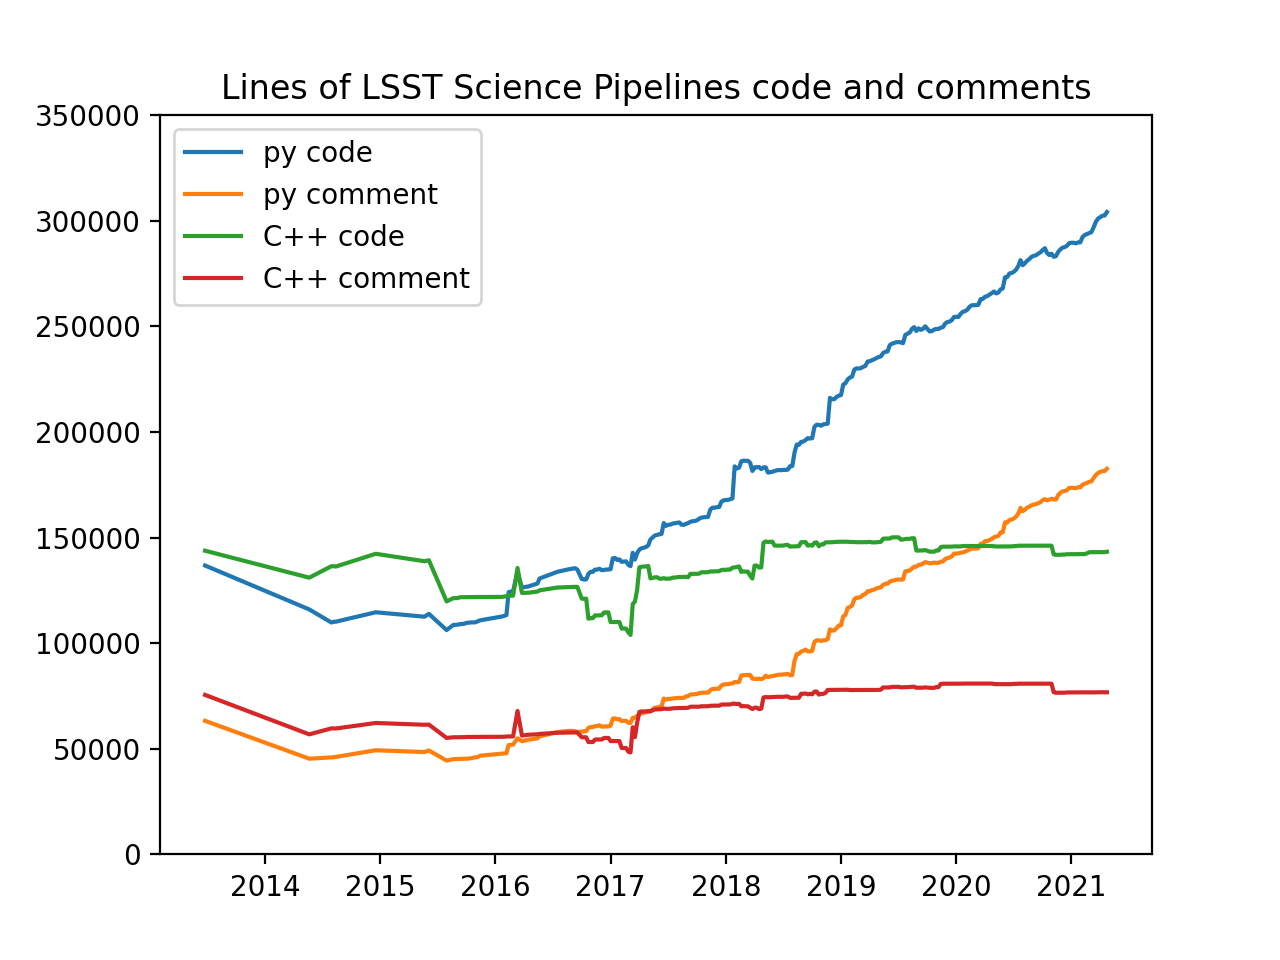

In [10]:
# pybind11 was introduced at 2017.25, also jointcal and astshim
# python3 port 2016.5
# python jump at w.2016.06?
# C++ and python spike at w.2016.12 not identified
# ndarray removed 2016.7
# meas_mosaic introduced at 2018.3
plt.plot(dates, datasets["python_code"])
plt.plot(dates, datasets["python_comment"])
plt.plot(dates, datasets["cpp_code"])
plt.plot(dates, datasets["cpp_comment"])
#plt.plot(dates, datasets["all_code"])
#plt.plot(dates, datasets["all_lines"])
plt.title('Lines of LSST Science Pipelines code and comments')
plt.ylim([0, 350_000])
plt.gca().legend(('py code', 'py comment', 'C++ code', 'C++ comment'))